## Mas informacion en:

- https://distill.pub/2016/misread-tsne/
- https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
- https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
- https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py
- https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
from sklearn.decomposition import PCA

In [2]:
import pandas as pd

In [4]:
n_samples = 300
centers = 5
n_components = 2

In [5]:
perplexities = [5, 10, 15, 30, 50, 100]

In [26]:
#X, y = datasets.make_blobs(n_samples=n_samples, centers=centers,
#                           n_features=30, cluster_std=5.0,)
data = datasets.load_digits()
X = data.data
y = data.target
#pca = PCA(n_components=0.97)
#X = pca.fit_transform(X)
centers = len(np.unique(y))

In [27]:
def asignar_color(NGRUPOS):
    color_codes = ["#%02x%02x%02x"%(int(r), int(g), int(b)) \
            for r, g, b, _ in 255*cm.jet(colors.Normalize()(range(NGRUPOS)))
    ]
    return color_codes

In [28]:
colorsn = asignar_color(centers)
colorsdict = dict(zip(np.unique(y), colorsn))

circles, perplexity=5 in 4.3 sec
circles, perplexity=10 in 4.3 sec
circles, perplexity=15 in 4.4 sec
circles, perplexity=30 in 5 sec
circles, perplexity=50 in 5.9 sec
circles, perplexity=100 in 7.8 sec


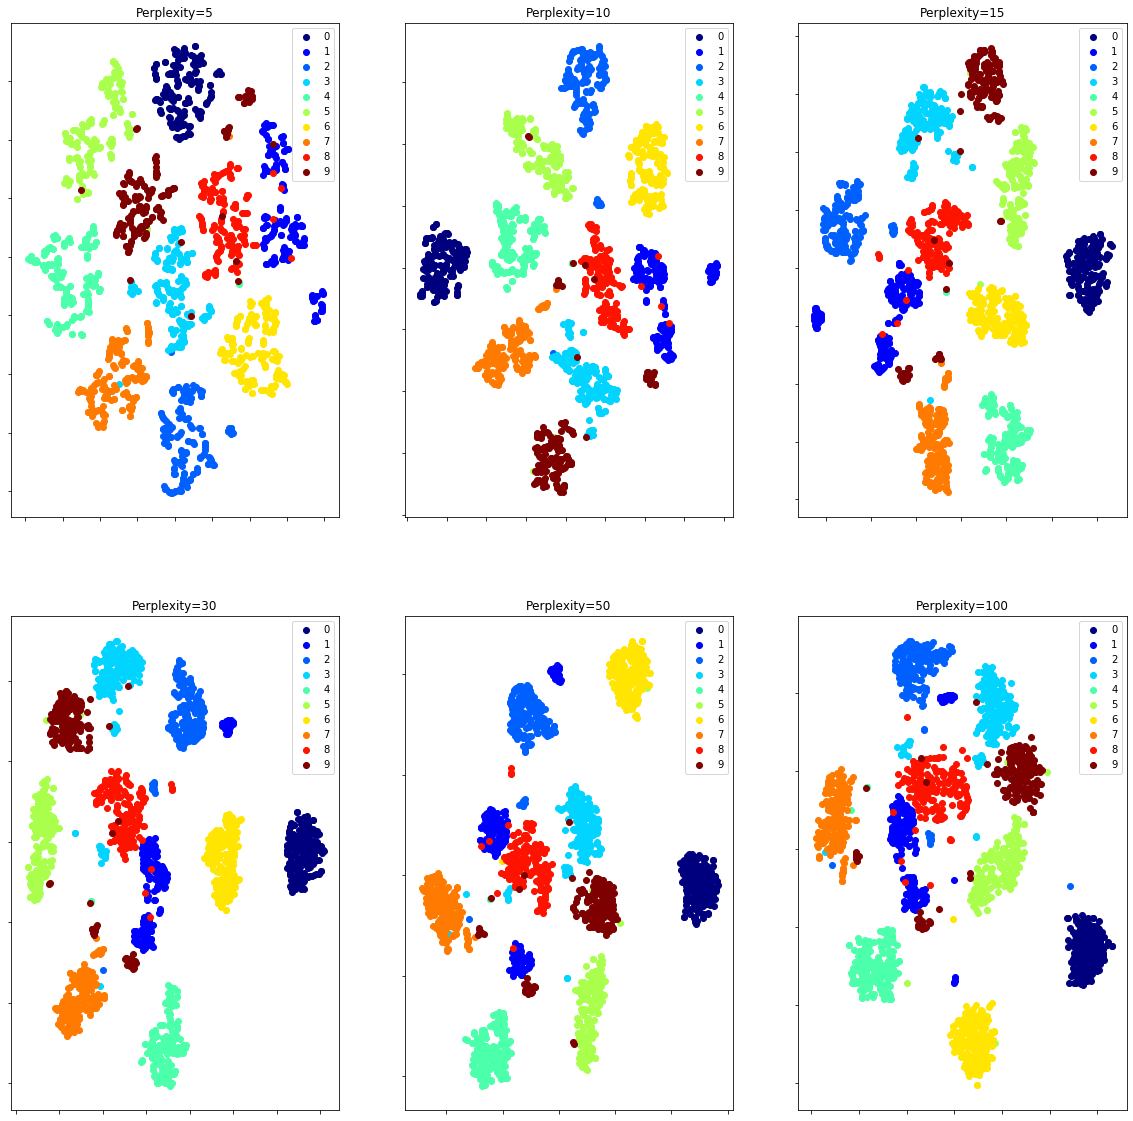

In [29]:
(fig, subplots) = plt.subplots(2, 3, figsize=(20, 20))
subplots = subplots.reshape(-1, )
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]
    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    for ci in np.unique(y):
        Yci = Y[y == ci, :]
        ax.scatter(Yci[:, 0], Yci[:, 1], c=colorsdict[ci], label=f"{ci}")
    #ax.scatter(Y[red, 0], Y[red, 1], c="r")
    #ax.scatter(Y[green, 0], Y[green, 1], c="g")
    #ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.legend()
    ax.axis('tight')

plt.show()